In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
from skimage import data
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 
#data_dir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/'
data_dir = './ImgData/'

In [21]:
########################
## 練習１
image1 = [0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0]
image2 = [0,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0]

array1 = np.array(image1)  # listをndarrayに変換
array2 = np.array(image2)
print(array1)
print(array2)
# array1とarray2の類似度を表示
print ("similarity = {}".format(np.dot(array1, array2)/(np.linalg.norm(array1)*np.linalg.norm(array2))))

[0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 1 0]
[0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 1 0 0]
similarity = 0.6389784510646973


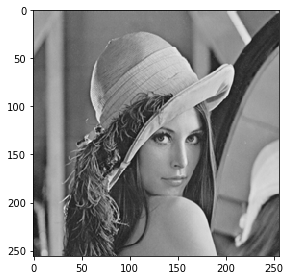

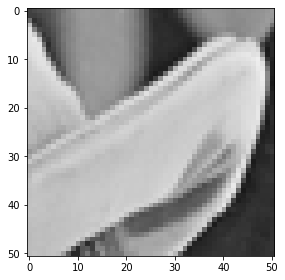

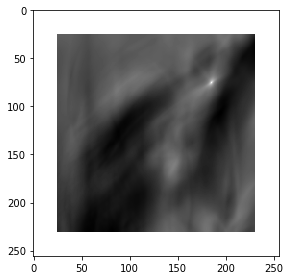

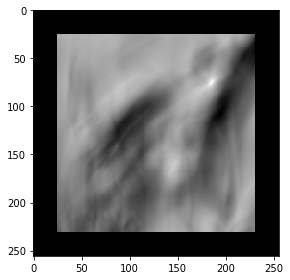

In [32]:
###########################
## テンプレートマッチング

from skimage import io
lenna = io.imread(data_dir + 'LENNA.bmp')
template = io.imread(data_dir + 'lenna_template.tif')

io.imshow(lenna)
plt.show()
io.imshow(template)
plt.show()

N,M = lenna.shape  # lennaの画像サイズを取得 (N: 横幅，M: 縦幅)
wx,wy = template.shape  # templateの画像サイズを取得 (wx: 横幅，wy: 縦幅)
hwx = int((wx-1)/2)
hwy = int((wy-1)/2)
D = np.zeros(lenna.shape)  # 距離行列
S = np.zeros(lenna.shape)  # 類似度行列
a = template.reshape([template.size])  # template画像を一次元配列に変換
a = a.astype(np.float64)
minsim = 1

# 各画素ごとに距離と類似度を算出
for i in range(hwx,N-hwx):
    for j in range(hwy,M-hwy):
        tmp = lenna[i-hwx:i+hwx+1,j-hwy:j+hwy+1]  # 着目画素周辺のテンプレート画像と同じ大きさのパッチ画像を取得
        b = tmp.reshape([tmp.size])  # パッチ画像を一次元配列に変換
        b = b.astype(np.float64)
        dis = np.linalg.norm(a-b)  # 距離を算出
        sim = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))  # 類似度を算出
        D[i,j] = dis
        S[i,j] = sim
        if minsim > sim:
            minsim = sim


## テンプレートマッチングの結果を可視化
# ユークリッド距離
D = D/np.max(D)  # 距離の最大値で正規化
io.imshow(1-D)  # 距離値が小さいほど輝度値が高くなるように表示
plt.show()

# 正規化相関
S2 = (S-minsim)/(np.max(S)-minsim)
S2[S2<0] = 0  # 負値を0に変換
io.imshow(S2)
plt.show()


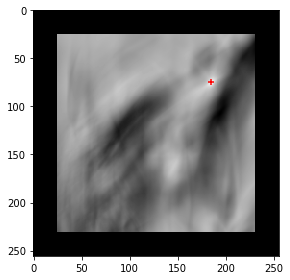

In [33]:
iy,ix = np.unravel_index(S.argmax(), S.shape)  # S(類似度)の最大値がある画素の座標を取得
io.imshow(S2)  # 正規化相関の結果を表示
plt.scatter(ix,iy,c='red',marker='+')  # S(類似度)の最大値がある位置にマーカをプロット

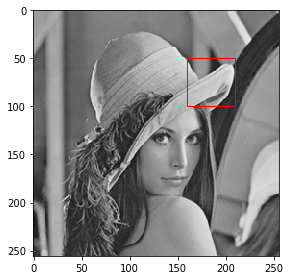

In [34]:
from skimage.color import gray2rgb
im = gray2rgb(lenna)  # grayscale画像をrgb画像に変換
im[iy-hwy,ix-hwx:ix+hwx,:] = [255,0,0]  # 縦軸がiy-hwy,横軸がix-hwxからix+hwxまでの位置にある画素を赤色に変換
im[iy+hwy,ix-hwx:ix+hwx,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix-hwx,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix+hwx,:] = [255,0,0]
io.imshow(im)

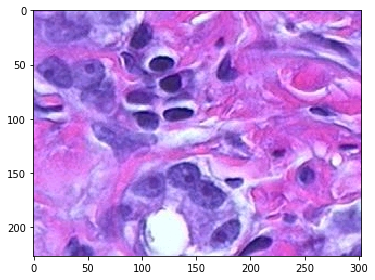

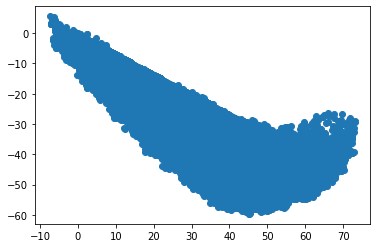

In [7]:
###########################
## clustering1
## 画像中の色のクラスタリング
from skimage import io
from skimage import color
he = io.imread(data_dir + 'hestain.png')
io.imshow(he)
plt.show()

helab = color.rgb2lab(he)  # Lab色空間へ変換
N, M, _ = helab.shape  # helabの画像サイズを取得
a = helab[:,:,1]  # Labのa成分(色情報)を取得
b = helab[:,:,2]  # Labのb成分(色情報)を取得
a = a.reshape(a.size)
b = b.reshape(b.size)
ab = []
for i in range(len(a)):
    ab.append([a[i],b[i]])
ab = np.array(ab)

# 横軸がa成分，縦軸がb成分の散布図を表示
plt.scatter(ab[:,0],ab[:,1])  

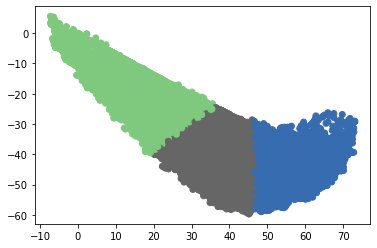

In [8]:
## ライブラリを使ったクラスタリング
from sklearn.cluster import KMeans
import matplotlib.cm as cm

K = 3  # cluster 数
vlist = ab
km_model = KMeans(n_clusters=K) #  K=3のkmeansモデルの初期化
km_model.fit(vlist) #  実際にデータをクラスタリング

km_model.cluster_centers_ #  クラスタの中心たち

labels = km_model.labels_ #  各データがどのクラスタかが入っている

# クラスターを色別に表示
plt.scatter(vlist[:,0], vlist[:,1], c=labels, cmap=cm.Accent)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


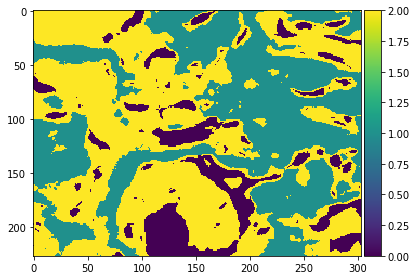

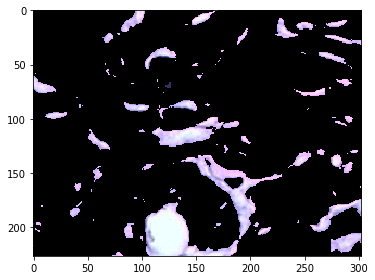

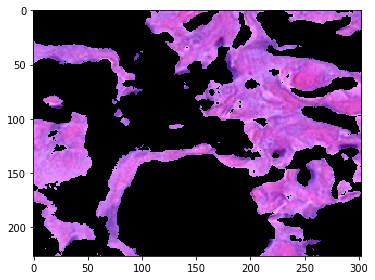

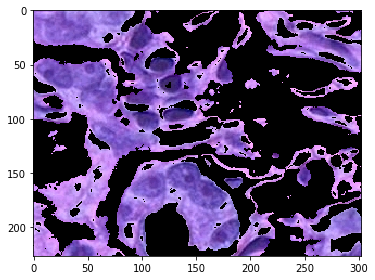

In [9]:
# 色でセグメント化するイメージの作成
labels = km_model.labels_
pixelLabels = labels.reshape(N,M)  #  クラスタリング結果を元の画像上に表示
io.imshow(pixelLabels)
plt.show()

# cluster1のみ表示
he = io.imread(data_dir + 'hestain.png')
c = he
c[pixelLabels!=0] = 0
io.imshow(c)
plt.show()

# cluster2のみ表示
he = io.imread(data_dir + 'hestain.png')
c = he
c[pixelLabels!=1] = 0
io.imshow(c)
plt.show()

# cluster3のみ表示
he = io.imread(data_dir + 'hestain.png')
c = he
c[pixelLabels!=2] = 0
io.imshow(c)
plt.show()

In [10]:
## clustering2: 手書き文字のクラスタリング
import os
#numberDir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/numbers/'
numberDir = data_dir + '/numbers/'
infolder0 = numberDir + '0/'  # "0"のディレクトリのパス
infolder1 = numberDir + '1/'  # "1"のディレクトリのパス
infolder2 = numberDir + '2/'  # "2"のディレクトリのパス

# 手書き文字データの前処理

data=[]
IDs = []

# "0"
data0=[]
infiles0 = os.listdir(infolder0)  # infolder0のディレクトリ内にある全ファイルの名前をリストで取得
for i in range(len(infiles0)):
    infile = infolder0 + infiles0[i]  # 画像ファイルのパス
    im = io.imread(infile)  # 画像読み込み
    N,M = im.shape
    im = im.reshape(im.size)  # 画像を一次元配列に変換
    a=[]
    for j in range(len(im)):
        a.append(im[j])  # 各画素をリストに追加
    data0.append(a)
    data.append(a)
    IDs.append(0)
    
# "1"
data1=[]
infiles1 = os.listdir(infolder1)
for i in range(len(infiles1)):
    infile = infolder1 + infiles1[i]
    im = io.imread(infile)
    N,M = im.shape
    im = im.reshape(im.size)
    a=[]
    for j in range(len(im)):
        a.append(im[j])
    data1.append(a)
    data.append(a)
    IDs.append(1)

# "2"
data2=[]
infiles2 = os.listdir(infolder2)
for i in range(len(infiles2)):
    infile = infolder2 + infiles2[i]
    im = io.imread(infile)
    N,M = im.shape
    im = im.reshape(im.size)
    a=[]
    for j in range(len(im)):
        a.append(im[j])
    data2.append(a)
    data.append(a)
    IDs.append(2)

In [11]:
# 手書き文字データをKMeansでクラスタリング
from sklearn.cluster import KMeans
import matplotlib.cm as cm

K = 3  # cluster 数
vlist = np.array(data)
km_model = KMeans(n_clusters=K)  # K=3のkmeansモデルの初期化
km_model.fit(vlist)   # 実際にデータをクラスタリング

centers = km_model.cluster_centers_  # クラスタの中心たち

labels = km_model.labels_  # 各データがどのクラスタかが入っている

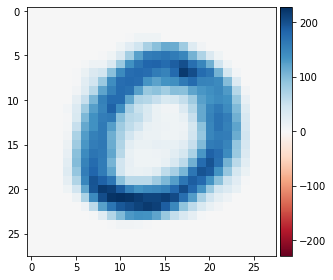

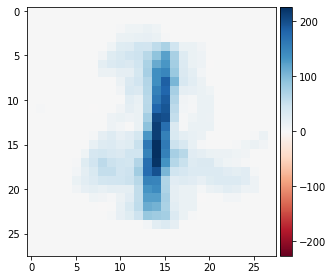

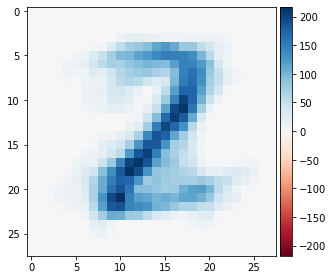

In [12]:
# 各クラスタの代表画像を取得
cim0 = centers[0]
cim1 = centers[1]
cim2 = centers[2]

# クラスタリング結果を元の画像サイズに変形
cim0 = cim0.reshape(N,M)
cim1 = cim1.reshape(N,M)
cim2 = cim2.reshape(N,M)

io.imshow(cim0)
plt.show()
io.imshow(cim1)
plt.show()
io.imshow(cim2)
plt.show()

In [35]:
## nearest neighbors
# test 用画像の読み込み
#infile0 = './drive/My Drive/Colab Notebooks/sample_data/ImgData/numbers/test/test0.tif'
#infile1 = './drive/My Drive/Colab Notebooks/sample_data/ImgData/numbers/test/test1.tif'
#infile2 = './drive/My Drive/Colab Notebooks/sample_data/ImgData/numbers/test/test2.tif'
infile0 = data_dir + '/numbers/test/test0.tif'
infile1 = data_dir + '/numbers/test/test1.tif'
infile2 = data_dir + '/numbers/test/test2.tif'
im0 = io.imread(infile0)  # "0"のテスト用画像を読み込み
im1 = io.imread(infile1)  # "1"のテスト用画像を読み込み
im2 = io.imread(infile2)  # "2"のテスト用画像を読み込み

# 各クラスタ代表画像と"0"のテスト用画像のユークリッド距離をそれぞれ算出
d0 = []
d0.append(np.linalg.norm(cim0-im0))
d0.append(np.linalg.norm(cim1-im0))
d0.append(np.linalg.norm(cim2-im0))
print(d0)

# 各クラスタ代表画像と"1"のテスト用画像のユークリッド距離をそれぞれ算出

d1 = []
d1.append(np.linalg.norm(cim0-im1))
d1.append(np.linalg.norm(cim1-im1))
d1.append(np.linalg.norm(cim2-im1))
print(d1)

# 各クラスタ代表画像と"2"のテスト用画像のユークリッド距離をそれぞれ算出
d2 = []
d2.append(np.linalg.norm(cim0-im2))
d2.append(np.linalg.norm(cim1-im2))
d2.append(np.linalg.norm(cim2-im2))
print(d2)

[1427.652310033222, 2751.0652233782553, 2574.5465792334503]
[2639.375356441245, 2103.032539758063, 1517.7012167681428]
[2219.690043130789, 1932.04023981936, 1861.1020176824286]


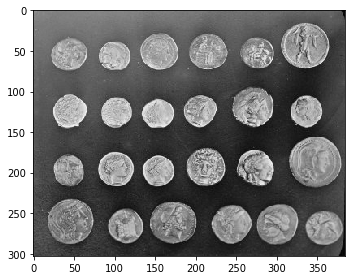

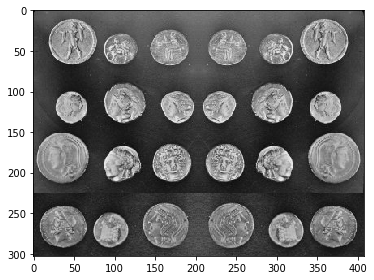

In [14]:
###########################
## 画像の定量化とその解析
from skimage import io
coins1 = io.imread(data_dir + 'coins1.tif')
coins2 = io.imread(data_dir + 'coins2.tif')
io.imshow(coins1)
plt.show()

io.imshow(coins2)
plt.show()

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


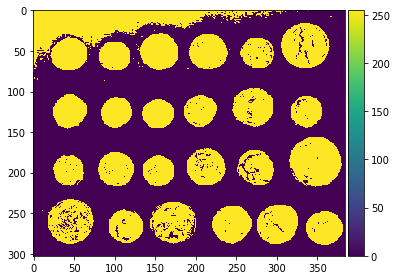

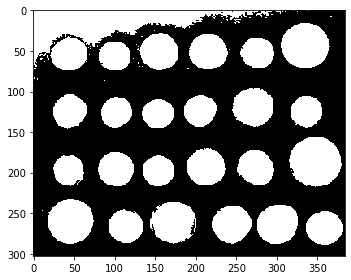

[70621  6757     1    16     5     3     1     1     2     1     2     2
     2     2     2     2     3     2     2     1     3    23     1     1
     3  2605     2     1     2     1     1     1     3  1680  1637     1
  1425     1     1     2     2  1227     1  1132     1     1     2     1
     1     1     2     2     2     2     1     2     1     1     3     1
     1     3     3     8     2     1     1     5     3     5     2     1
     3     1     1     3     1     1     1    10     1     3     4     2
     4     1     1     2  1892  1321  1214  1170  1127  1104     3     1
  3096  1721     1  1519  1477  1099  1157     1     1     3  2434  2178
     1  1962  1734  1377     1  1473     1     1     1]


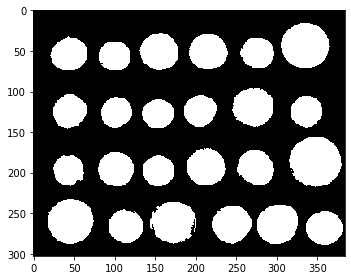

In [15]:
############
# coins1
coins = coins1

# Segmentation
segmented_img = np.zeros(coins.shape)
mask = coins[:,:] > 0.43*255  # coinsの画素値が0.43*255以上の位置をTrue，それ以外をFalseとするマスクを作成
segmented_img[mask] = 255  # maskの画素がTrueの位置に255を代入
io.imshow(segmented_img)
io.show()

# fill
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(segmented_img)  # 穴埋め
io.imshow(fill_coins)
io.show()

# labeling and remove small and large blobs
from scipy import ndimage as ndi
# ラベル付けしたndarray(label_objects)とラベル数(nb_labels)を取得
label_objects, nb_labels = ndi.label(fill_coins)
# 各ラベルの画素数を取得
sizes = np.bincount(label_objects.ravel())  # ravelでlabel_objectsを一次元化
print(sizes)

mask_sizes = np.zeros(sizes.shape)
for i in range(len(sizes)):
  # 画素数が100より大きく，5000より小さいラベルのときTrue
  # それ以外のときFalseとなるマスクを作成
  mask_sizes[i] = 100<sizes[i] and sizes[i]<5000
labeled_coins1 = mask_sizes[label_objects]  # mask_sizesがTrueの画素のみ残す(条件を満たす塊を抽出)
io.imshow(labeled_coins1)
io.show()
labeled_coins1, N1 = ndi.label(labeled_coins1)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


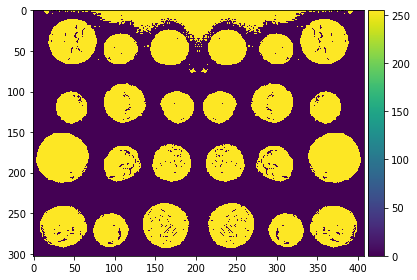

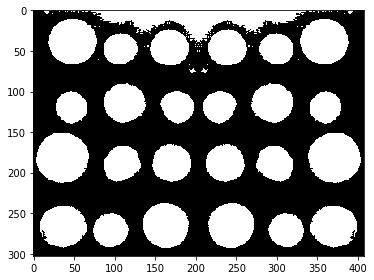

[73584    28     1     2     2     1     2    27    14  4824    14    27
     2     1     2     2     1    28     3     3     1     1     1     1
     1     1     1     6     6     1  2627     2     2  2627     3     2
     2     2     2     3     1     1     1     1     1     1     1     1
     1     1     1     1     1     1  1652  1652     1     1     1     1
     1     1  1259     4     1     1     4  1259     1     1     1     1
     1     1     1     1     1     1     1     2     2     1     5     5
     1     1     1     2     1     6     6     1     2     6     2     1
     3     3     1     1     4     4     2     1     1     2    20    20
     1     1  1921  1921  1187  1228  1228  1187  3140  3140  1743  1743
  1534  1534  2463  2463  2264  2264  1411     3     3  1411     1     1
     1     1]


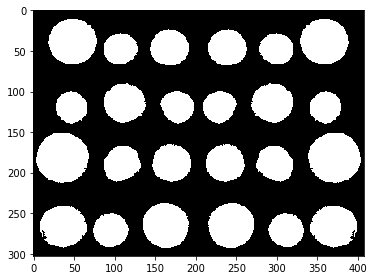

In [16]:
############
# coins2
coins = coins2

# Segmentation
segmented_img = np.zeros(coins.shape)
#mask = coins[:,:] > 0.43*255
mask = coins[:,:] > 0.38*255
segmented_img[mask] = 255
io.imshow(segmented_img)
io.show()

# fill
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(segmented_img)
io.imshow(fill_coins)
io.show()

# labeling and remove small and large blobs
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
print(sizes)
mask_sizes = np.zeros(sizes.shape)
for i in range(len(sizes)):
  mask_sizes[i] = 100<sizes[i] and sizes[i]<4000
labeled_coins2 = mask_sizes[label_objects]
io.imshow(labeled_coins2)
io.show()
labeled_coins2, N2 = ndi.label(labeled_coins2)

coins1:
 mean:1615.0416666666667, var:263915.95659722225
coins2:
 mean:1869.0833333333333 , var:361219.07638888893


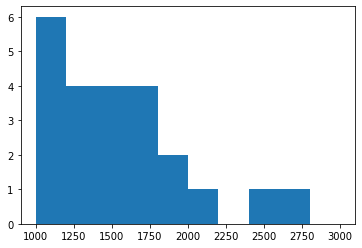

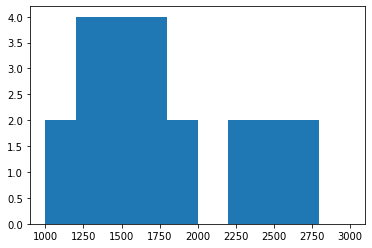

In [17]:
############################
# size を測定
N = N1
sizeList1 = []
sizeTh = 500
for i in range(1,np.int16(N)+1):
    # ラベルごとに座標を取得
    ix,iy = np.where( labeled_coins1 == i )
    # sizeTh以下はノイズとして除去
    if len(ix)<sizeTh:
        continue
    sizeList1.append(len(ix))

N = N2
sizeList2 = []
for i in range(1,np.int16(N)+1):
    # ラベルごとに座標を取得
    ix,iy = np.where( labeled_coins2 == i )
    # sizeTh以下はノイズとして除去
    if len(ix)<sizeTh:
        continue
    sizeList2.append(len(ix))

# 平均と分散を表示
print('coins1:\n mean:{}, var:{}'.format(np.mean(sizeList1),np.var(sizeList1)));
print('coins2:\n mean:{}, var:{}'.format(np.mean(sizeList2),np.var(sizeList2)));

# histogram
plt.hist(sizeList1,range=[1000,3000])
plt.show()
plt.hist(sizeList2,range=[1000,3000])
plt.show()
    

In [18]:
############################
# t 検定
from scipy import stats
t, p = stats.ttest_ind(sizeList1, sizeList2,equal_var=False)
print(t)
print(p)

-1.5409266009999318
0.13035168300344802
